In [1]:
% pylab inline

from scipy import ndimage as nd
from scipy.misc import imresize
from scipy.signal import convolve2d

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
import matplotlib.ticker as plticker


Populating the interactive namespace from numpy and matplotlib


# Gabor Kernels
 * theta : Orientation in radians. If 0, the harmonic is in the x-direction.
 
 * frequency : Spatial frequency of the harmonic function. Specified in pixels.
 
 * sigma :  Standard deviation in x- and y-directions. These directions apply to the kernel before rotation. If theta = pi/2, then the kernel is rotated 90 degrees so that sigma_x controls the vertical direction.

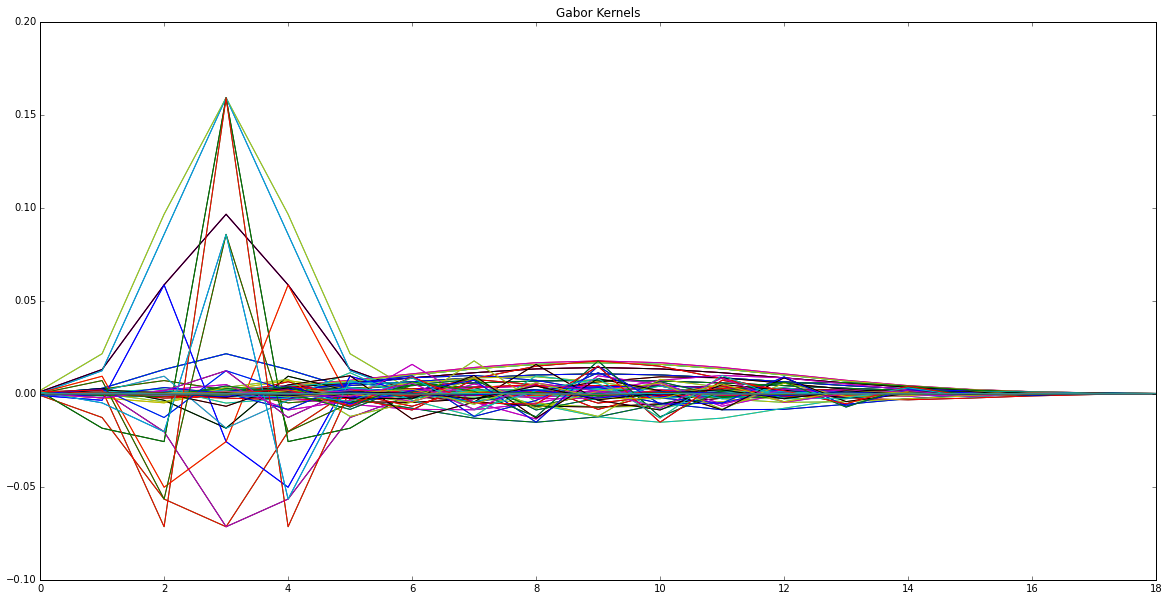

In [2]:
# prepare filter bank kernels
kernels = []
thetas = [pi * d / 180 for d in np.linspace(0,157.5,8)] # degrees -> radians
for theta in thetas: # 
    for sigma in (1, 3):
        for frequency in [1]: 
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)
plt.figure(figsize=(20,10))            
for k in np.array(kernels):
    plt.plot(k)
plt.title("Gabor Kernels")

In [3]:
# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in thetas:
    for frequency in [.01]:
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append(kernel)

In [4]:
# shitty function to make a smaller gabor
def kernel_stacker(kernel,axislen=2):
    stacked = np.real(kernel)
    iters = int(np.ceil(np.log2(axislen)))
    for i in xrange ( iters) :
        stacked = np.hstack((stacked,np.zeros(stacked.shape)))
        stacked = np.vstack((stacked,np.zeros(stacked.shape)))
    return stacked

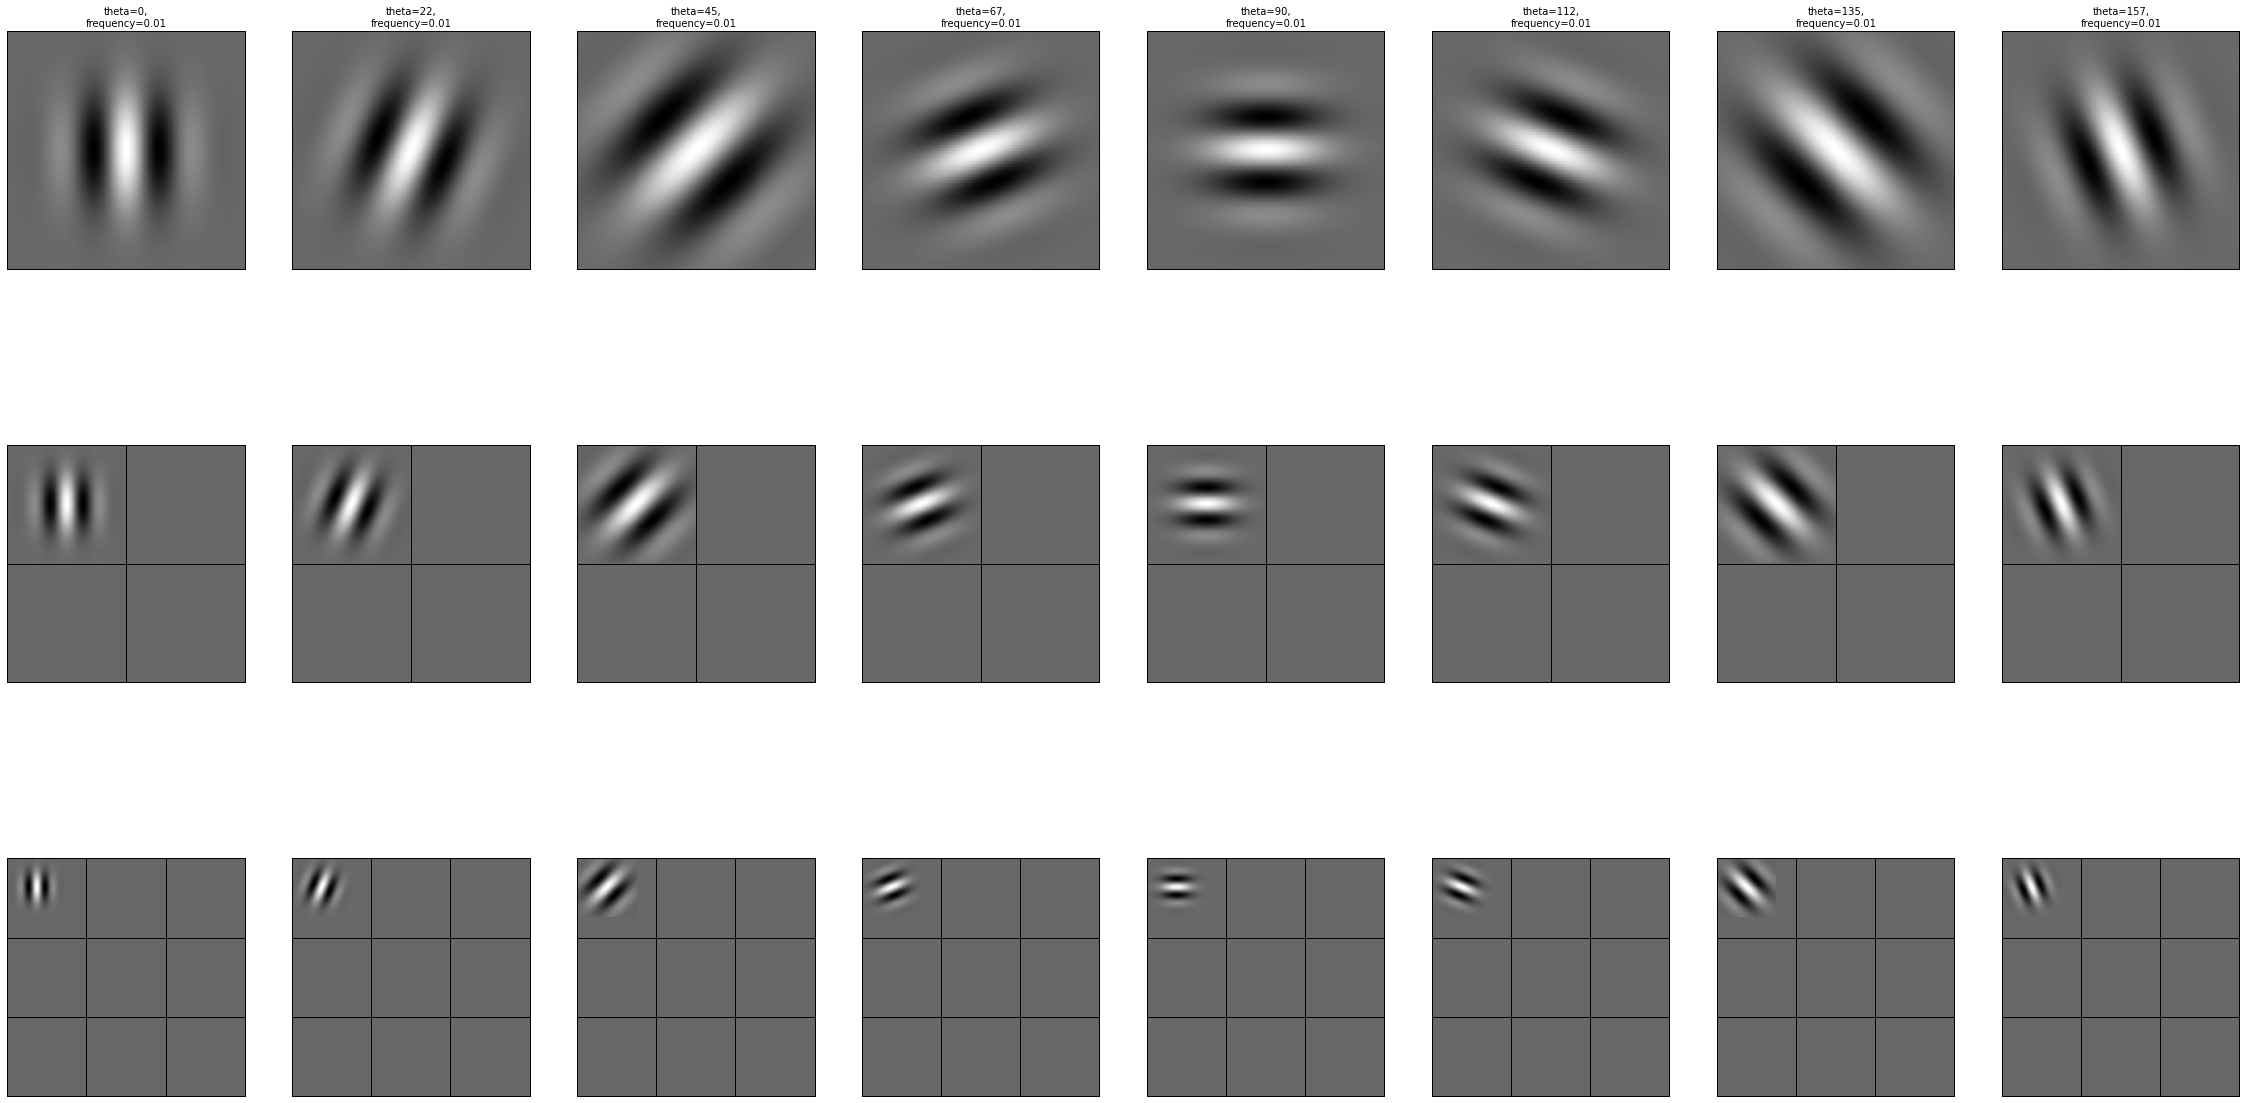

In [19]:
nrows = 3
fig= plt.subplots(nrows=nrows, ncols=len(thetas), figsize=(40, nrows* 7))
plt.gray()

for label, kernel, i in zip(kernel_params, results,np.arange(len(kernels))):
    ax = plt.subplot(3,len(thetas),i+1)
    cax = ax.imshow(np.real(kernel), interpolation='nearest')
    #cbar = colorbar(cax, ticks=[np.min(kernel), 0, np.max(kernel)], orientation='vertical')
    ax.set_title(label, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ay = plt.subplot(3,len(thetas),len(thetas) + i+1)
    kstack = kernel_stacker(kernel)
    ay.imshow(kstack,interpolation='nearest')
    ay.set_xticks([kstack.shape[0] / 2])
    ay.set_yticks([kstack.shape[0] / 2])
    ay.grid()
    ay.xaxis.set_ticklabels([])
    ay.yaxis.set_ticklabels([])

    ay.grid(which='major', axis='both',color='black',linestyle='-',linewidth=1)
    ay = plt.subplot(3,len(thetas),len(thetas)*2 + i+1)
    kstack = kernel_stacker(kernel,3)
    ay.imshow(kstack,interpolation='nearest')
    ay.set_xticks([kstack.shape[0] / 3,(kstack.shape[0] / 3)*2])
    ay.set_yticks([kstack.shape[0] / 3,(kstack.shape[0] / 3)*2])
    ay.grid()
    ay.grid(which='major', axis='both',color='black',linestyle='-',linewidth=1)
    ay.xaxis.set_ticklabels([])
    ay.yaxis.set_ticklabels([])

    
    # size of the actual kernel defines size in convolve 
    # get or x size gabor images

In [6]:
def normalize_and_apply_gabor(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)
def bw(img):
    from skimage.color import rgb2gray
    return imresize(rgb2gray(img),(300,300))

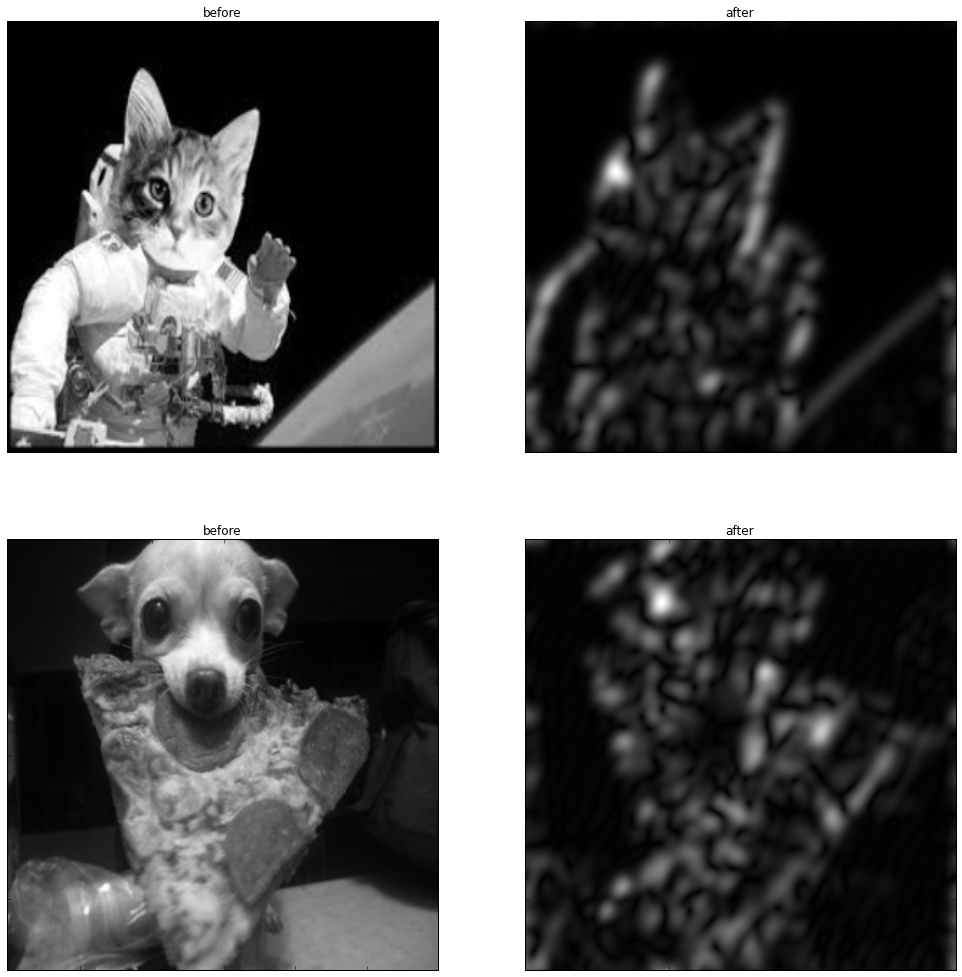

In [38]:
fig = plt.figure(figsize=(17,17))
cat = bw(img_as_float(data.load('/home/nick/books/images/cat.jpg')))
ax = plt.subplot(221)
plt.title('before')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
imshow(cat)
ax = plt.subplot(222)
plt.title('after')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
imshow(normalize_and_apply_gabor(cat,gabor_kernel(.1,theta=.5)))

dog = bw(img_as_float(data.load('/home/nick/books/images/dog.jpg')))
ax = plt.subplot(223)
plt.title('before')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
imshow(dog)
ax = plt.subplot(224)
plt.title('after')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
imshow(normalize_and_apply_gabor(dog,gabor_kernel(.1,theta=.5)))